In [7]:
import tensorflow as tf
# tf.logging.set_verbosity(tf._logging.ERROR)

Task:2 The dataset <br>
Import MNIST

In [10]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


shapes of Imported Arrays

In [12]:
print('x_train shape',x_train.shape)
print('y_tains shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 28, 28)
y_tains shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


Plot an Image Example

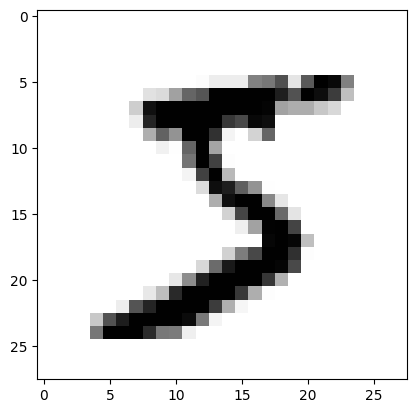

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

Display labels

In [19]:
y_train[0]

5

In [20]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


One Hot Encoding 

Encoding Labels

In [21]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train_encoded= to_categorical(y_train)
y_test_encoded= to_categorical(y_test)

Validated Shapes

In [24]:
print('y_train_encoded shape:',y_train_encoded.shape)
print('y_test_encoded  shape:', y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded  shape: (10000, 10)


Display Encoded Labels

In [26]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Task 4: Neural Networks <br>
Linear Equations

Task5 : Preprocessing the Examples <br>
Inrolling N-dimensional Arrays to Vectors

In [30]:
import numpy as np
x_train_reshaped=np.reshape(x_train, (60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

print('x_train_reshaped',x_train_reshaped)
print('x_train_reshaped',x_test_reshaped)

x_train_reshaped [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
x_train_reshaped [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Display Pixel Values

In [40]:
print(set(x_test_reshaped[0]))

{0, 129, 1, 3, 133, 5, 9, 140, 14, 17, 18, 19, 21, 22, 151, 159, 31, 163, 36, 35, 166, 38, 40, 170, 44, 52, 182, 185, 58, 59, 60, 187, 62, 57, 61, 66, 67, 198, 72, 75, 203, 205, 77, 207, 209, 83, 84, 219, 221, 222, 224, 225, 121, 227, 126, 229, 233, 106, 236, 238, 240, 241, 114, 115, 242, 248, 249, 250, 251, 253, 254, 255}


Data Normalization

In [43]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon =1e-10

x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std + epsilon)

Display Normalized Pixel Values

In [44]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

Task6: Creatin a Model  <br>
Creating the model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



model= Sequential([
    
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
    
                 ])

2023-12-13 17:27:54.618855: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Compiling the Model

In [53]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Task7: Training the Model  <br>
Training the Model

In [54]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3760 - accuracy: 0.8899
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1853 - accuracy: 0.9459
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1398 - accuracy: 0.9592


Evaluating the Model

In [57]:
_, accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Test set accuracy:',accuracy*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.1359 - accuracy: 0.9585
Test set accuracy: 95.85000276565552


Task 8 : Predictions <br>
Prediction on Test Set

In [58]:
preds=model.predict(x_test_norm)
print('Shape of preds:',preds.shape)

313/313 [==============================] - 1s 3ms/step
Shape of preds: (10000, 10)


Plotting the result

In [59]:
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

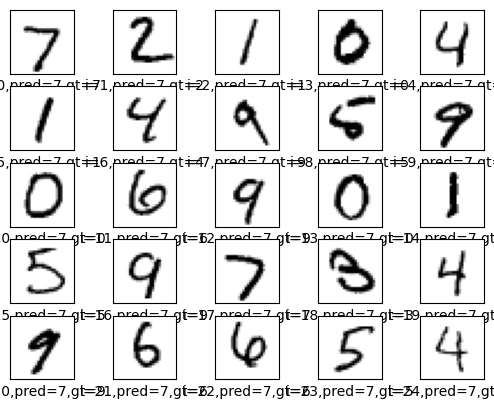

In [64]:
start_index=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(preds[start_index])
    gt =y_test[start_index+i]
    
    col='g'
    if pred != gt:
        col='r'
        
    
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt))
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

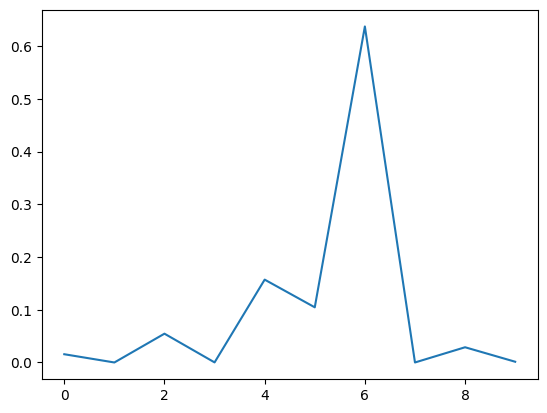

In [67]:
plt.plot(preds[8])
plt.show()